In [74]:
import finesse
import numpy as np
import matplotlib.pyplot as plt
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Add a Laser named L0 with a power of 1 W.
    l L0 P=1

    # Space attaching L0 <-> m1 with length of 0 m (default).
    s s0 L0.p1 m1.p1

    # Input mirror of cavity.
    m m1 R=0.98 T=0.02

    # Intra-cavity space with length of 1 m.
    s CAV m1.p2 m2.p1 L=1

    # End mirror of cavity.
    m m2 R=0.98 T=0.02

    # Power detectors on reflection, circulation and transmission.
    pd refl m1.p1.o
    pd circ m2.p1.i
    pd trns m2.p2.o

    # Scan over the detuning DOF of m1 from -180 deg to +180 deg with 10000 points.
    xaxis(m1.phi, lin, -180, 180, 10000)
    """
)

In [75]:
out = kat.run()
out["refl"][0]

1.6916317166020584e-28

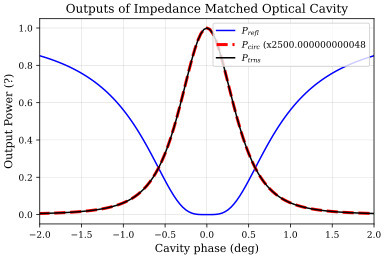

In [88]:
plt.plot(out.x[0], (out["refl"])**2, label=r"$P_{refl}$")
plt.plot(out.x[0], (out["circ"])**2 / np.max(out["circ"]**2), label=r"$P_{circ}$ (x"+ str(np.max(out["circ"]**2)), linewidth="3", linestyle="--")
plt.plot(out.x[0], (out["trns"])**2, label=r"$P_{trns}$")
plt.xlabel("Cavity phase (deg)")
plt.ylabel("Output Power (?)")
plt.title("Outputs of Impedance Matched Optical Cavity")
plt.xlim(-2,2)
plt.legend()

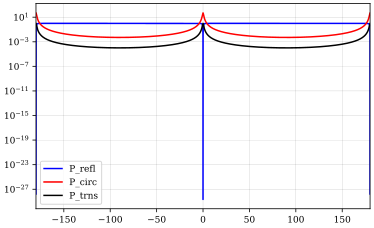

In [89]:
plt.plot(out.x[0], out["refl"], label="P_refl")
plt.plot(out.x[0], out["circ"], label="P_circ")
plt.plot(out.x[0], out["trns"], label="P_trns")
plt.yscale("log")
plt.legend()

/var/folders/45/p3yqhznd40vfxfpn3g_df45c0000gn/T/ipykernel_29017/3341099580.py:3: RuntimeWarning: divide by zero encountered in divide
  wave = 4 * np.pi * L/phi


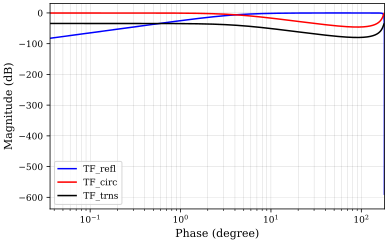

In [78]:
def phase_to_freq(phi):
    L = 50
    wave = 4 * np.pi * L/phi
    freq = 3e8/wave
    return freq

def transfer_func(energy):
    TF = energy/(out["refl"] + out["circ"] + out["trns"])
    return TF

TF_refl = transfer_func(out["refl"])
TF_circ = transfer_func(out["circ"])
TF_trns = transfer_func(out["trns"])

freq_range = phase_to_freq(out.x[0])

def TF_to_dB(TF):
    return 20 * np.log10(np.abs(TF))

plt.semilogx(out.x[0], TF_to_dB(TF_refl), label="TF_refl")
plt.semilogx(out.x[0], TF_to_dB(TF_circ), label="TF_circ")
plt.semilogx(out.x[0], TF_to_dB(TF_trns), label="TF_trns")
plt.xlabel("Phase (degree)")
plt.ylabel("Magnitude (dB)")
plt.legend()

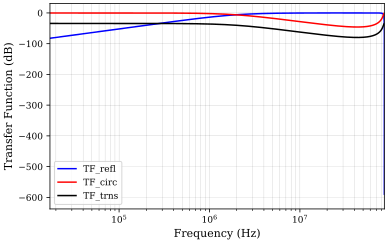

In [79]:
plt.semilogx(freq_range, TF_to_dB(TF_refl), label="TF_refl")
plt.semilogx(freq_range, TF_to_dB(TF_circ), label="TF_circ")
plt.semilogx(freq_range, TF_to_dB(TF_trns), label="TF_trns")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Transfer Function (dB)")
plt.legend()

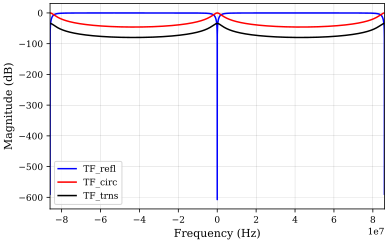

In [80]:
plt.plot(freq_range, TF_to_dB(TF_refl), label="TF_refl")
plt.plot(freq_range, TF_to_dB(TF_circ), label="TF_circ")
plt.plot(freq_range, TF_to_dB(TF_trns), label="TF_trns")
# plt.xscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.legend()

/var/folders/45/p3yqhznd40vfxfpn3g_df45c0000gn/T/ipykernel_29017/1896850172.py:5: RuntimeWarning: divide by zero encountered in divide
  wave = 4 * np.pi * L/phi


array([<Axes: ylabel='Magnitude [dB]'>,
       <Axes: xlabel='Frequency [Hz]', ylabel='Phase [Deg]'>],
      dtype=object)

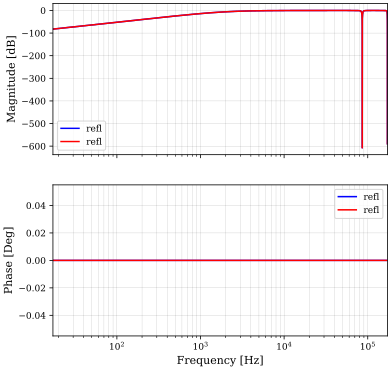

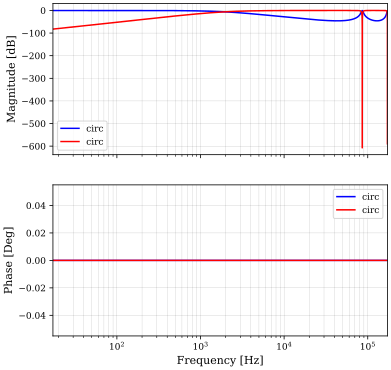

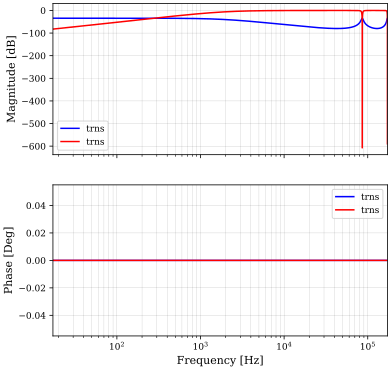

In [81]:
L = 50000
phi_range = np.linspace(0,360, 10001)

def phi_to_freq(phi):
    wave = 4 * np.pi * L/phi
    freq = 3e8/wave
    return freq

freq_range = phi_to_freq(phi_range)

axs1 = finesse.plotting.plot.bode(freq_range, TF_refl, label='refl')
axs2 = finesse.plotting.plot.bode(freq_range, TF_circ, label='circ')
axs3 = finesse.plotting.plot.bode(freq_range, TF_trns, label='trns')
from finesse.plotting import bode
bode(freq_range, TF_refl, axs=axs1, label='refl')
bode(freq_range, TF_refl, axs=axs2, label='circ')
bode(freq_range, TF_refl, axs=axs3, label='trns')

In [82]:
help(finesse.plotting.plot.bode)

Help on function bode in module finesse.plotting.plot:

bode(f, *Y, axs=None, return_axes=True, figsize=(6, 6), db=True, wrap=True, **kwargs)
    Create a Bode plot for a complex array.
    
    Parameters
    ----------
    f : array_like
        Frequencies
    *Y : array_like
        Complex valued transfer functions evaluated at frequencies `f`
    axs : Axes, optional
        Axes to use to plot transfer functions on. Magnitude plotted on axs[0]
        and phase on axs[1].
    db : bool, optional
        Plot magnitude in dB
    wrap : bool, optional
        Wrap phase
    figsize : tuple
        Figure size
    **kwargs
        Additional arguments are passed to the semilog calls
    
    Examples
    --------
    >>> axs = bode(f, CLG, label='CLG')
    >>> bode(f, CHR, axs=axs, label='CHR')

